<a href="https://colab.research.google.com/github/jai2shan/TSAI-EVA40-Assignments/blob/master/Session%209/Assignment_9_Step%203_updated%2010%20mins%20after%20asgnt%20submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install asgnmt9-0.0.6-py3-none-any.whl


Processing ./asgnmt9-0.0.6-py3-none-any.whl


## Updates in this trial

> Changing the learning rate to 0.1

In [4]:
from torchvision import transforms
from asgnmt9.DataLoader import cifar_data_loader,View_images
transform_params = dict()
transform_params['train'] = transforms.Compose([
                                       transforms.RandomRotation(10),
                                       transforms.RandomHorizontalFlip(),  
                                       transforms.RandomAffine(0,shear=10,scale=(0.8,1.2)),  
                                       transforms.ColorJitter(brightness=0.2,contrast=0.2,saturation=0.2),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))])

transform_params['test'] = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))])


classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

trainloader,testloader = cifar_data_loader(transform_params,BatchSize=250)

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [5]:
import torch

from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

from asgnmt9.resnet import ResNet18
net = ResNet18().to(device)
summary(net, input_size=(3,32,32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [6]:
from asgnmt9.Training_Testing import TrainTest
import torch.optim as optim
import torch.nn as nn
from torch.optim.lr_scheduler import StepLR

tt = TrainTest()
test_acc = 0
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9,weight_decay = 0.00005)
scheduler = StepLR(optimizer, step_size=20, gamma=0.1)

for epoch in range(30):
    print("EPOCH:", epoch)
    tt.train_(net, device, trainloader, optimizer, criterion, epoch,L1 = False)
    scheduler.step()
    acc = tt.test_(net, device, testloader)  
    
   
print('Finished Training')

  0%|          | 0/200 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.5757079124450684 Batch_id=199 Accuracy=33.49: 100%|██████████| 200/200 [00:36<00:00,  5.43it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -2.4345, Accuracy: 4358/10000 (43.58%)

EPOCH: 1


Loss=1.1403439044952393 Batch_id=199 Accuracy=49.56: 100%|██████████| 200/200 [00:36<00:00,  5.48it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -3.1093, Accuracy: 5558/10000 (55.58%)

EPOCH: 2


Loss=1.0338996648788452 Batch_id=199 Accuracy=59.22: 100%|██████████| 200/200 [00:36<00:00,  5.47it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -4.2062, Accuracy: 6338/10000 (63.38%)

EPOCH: 3


Loss=1.0078096389770508 Batch_id=199 Accuracy=65.38: 100%|██████████| 200/200 [00:36<00:00,  5.50it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -4.3533, Accuracy: 6937/10000 (69.37%)

EPOCH: 4


Loss=0.7807393074035645 Batch_id=199 Accuracy=69.20: 100%|██████████| 200/200 [00:36<00:00,  5.50it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -5.2017, Accuracy: 7369/10000 (73.69%)

EPOCH: 5


Loss=0.8213245868682861 Batch_id=199 Accuracy=72.84: 100%|██████████| 200/200 [00:36<00:00,  5.52it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -5.6693, Accuracy: 7511/10000 (75.11%)

EPOCH: 6


Loss=0.6624593734741211 Batch_id=199 Accuracy=75.58: 100%|██████████| 200/200 [00:36<00:00,  5.51it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -6.5308, Accuracy: 7855/10000 (78.55%)

EPOCH: 7


Loss=0.4674806296825409 Batch_id=199 Accuracy=77.80: 100%|██████████| 200/200 [00:36<00:00,  5.51it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -6.6974, Accuracy: 8014/10000 (80.14%)

EPOCH: 8


Loss=0.5674134492874146 Batch_id=199 Accuracy=79.66: 100%|██████████| 200/200 [00:35<00:00,  5.56it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -7.5888, Accuracy: 8123/10000 (81.23%)

EPOCH: 9


Loss=0.5439000725746155 Batch_id=199 Accuracy=81.31: 100%|██████████| 200/200 [00:36<00:00,  5.54it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -8.2307, Accuracy: 8298/10000 (82.98%)

EPOCH: 10


Loss=0.5210158824920654 Batch_id=199 Accuracy=82.52: 100%|██████████| 200/200 [00:36<00:00,  5.52it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -8.1418, Accuracy: 8351/10000 (83.51%)

EPOCH: 11


Loss=0.44197988510131836 Batch_id=199 Accuracy=83.61: 100%|██████████| 200/200 [00:36<00:00,  5.49it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -8.5128, Accuracy: 8448/10000 (84.48%)

EPOCH: 12


Loss=0.4593777358531952 Batch_id=199 Accuracy=84.56: 100%|██████████| 200/200 [00:36<00:00,  5.49it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -8.6316, Accuracy: 8586/10000 (85.86%)

EPOCH: 13


Loss=0.4286605417728424 Batch_id=199 Accuracy=85.47: 100%|██████████| 200/200 [00:36<00:00,  5.51it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -9.4140, Accuracy: 8474/10000 (84.74%)

EPOCH: 14


Loss=0.29672500491142273 Batch_id=199 Accuracy=86.39: 100%|██████████| 200/200 [00:36<00:00,  5.53it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -9.4370, Accuracy: 8322/10000 (83.22%)

EPOCH: 15


Loss=0.3975277245044708 Batch_id=199 Accuracy=87.22: 100%|██████████| 200/200 [00:36<00:00,  5.53it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -9.4856, Accuracy: 8546/10000 (85.46%)

EPOCH: 16


Loss=0.3111671507358551 Batch_id=199 Accuracy=87.71: 100%|██████████| 200/200 [00:36<00:00,  5.50it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -10.1693, Accuracy: 8576/10000 (85.76%)

EPOCH: 17


Loss=0.33213838934898376 Batch_id=199 Accuracy=88.27: 100%|██████████| 200/200 [00:36<00:00,  5.52it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -10.3815, Accuracy: 8772/10000 (87.72%)

EPOCH: 18


Loss=0.29555538296699524 Batch_id=199 Accuracy=88.84: 100%|██████████| 200/200 [00:36<00:00,  5.54it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -10.9022, Accuracy: 8703/10000 (87.03%)

EPOCH: 19


Loss=0.2571081221103668 Batch_id=199 Accuracy=89.49: 100%|██████████| 200/200 [00:36<00:00,  5.53it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -10.5050, Accuracy: 8677/10000 (86.77%)

EPOCH: 20


Loss=0.21464087069034576 Batch_id=199 Accuracy=92.90: 100%|██████████| 200/200 [00:36<00:00,  5.50it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -12.9815, Accuracy: 9003/10000 (90.03%)

EPOCH: 21


Loss=0.13781823217868805 Batch_id=199 Accuracy=93.93: 100%|██████████| 200/200 [00:36<00:00,  5.48it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -13.5999, Accuracy: 9044/10000 (90.44%)

EPOCH: 22


Loss=0.15135028958320618 Batch_id=199 Accuracy=94.25: 100%|██████████| 200/200 [00:36<00:00,  5.53it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -13.9294, Accuracy: 9073/10000 (90.73%)

EPOCH: 23


Loss=0.1450362354516983 Batch_id=199 Accuracy=94.83: 100%|██████████| 200/200 [00:36<00:00,  5.51it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -14.3632, Accuracy: 9057/10000 (90.57%)

EPOCH: 24


Loss=0.14660701155662537 Batch_id=199 Accuracy=94.98: 100%|██████████| 200/200 [00:36<00:00,  5.52it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -14.5478, Accuracy: 9083/10000 (90.83%)

EPOCH: 25


Loss=0.13746607303619385 Batch_id=199 Accuracy=95.03: 100%|██████████| 200/200 [00:36<00:00,  5.51it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -14.7600, Accuracy: 9085/10000 (90.85%)

EPOCH: 26


Loss=0.1169910579919815 Batch_id=199 Accuracy=95.35: 100%|██████████| 200/200 [00:36<00:00,  5.48it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -14.7936, Accuracy: 9061/10000 (90.61%)

EPOCH: 27


Loss=0.15054266154766083 Batch_id=199 Accuracy=95.51: 100%|██████████| 200/200 [00:36<00:00,  5.48it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -14.8225, Accuracy: 9059/10000 (90.59%)

EPOCH: 28


Loss=0.13283893465995789 Batch_id=199 Accuracy=95.59: 100%|██████████| 200/200 [00:36<00:00,  5.51it/s]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -14.9952, Accuracy: 9060/10000 (90.60%)

EPOCH: 29


Loss=0.09185168147087097 Batch_id=199 Accuracy=95.77: 100%|██████████| 200/200 [00:36<00:00,  5.49it/s]



Test set: Average loss: -15.1914, Accuracy: 9069/10000 (90.69%)

Finished Training


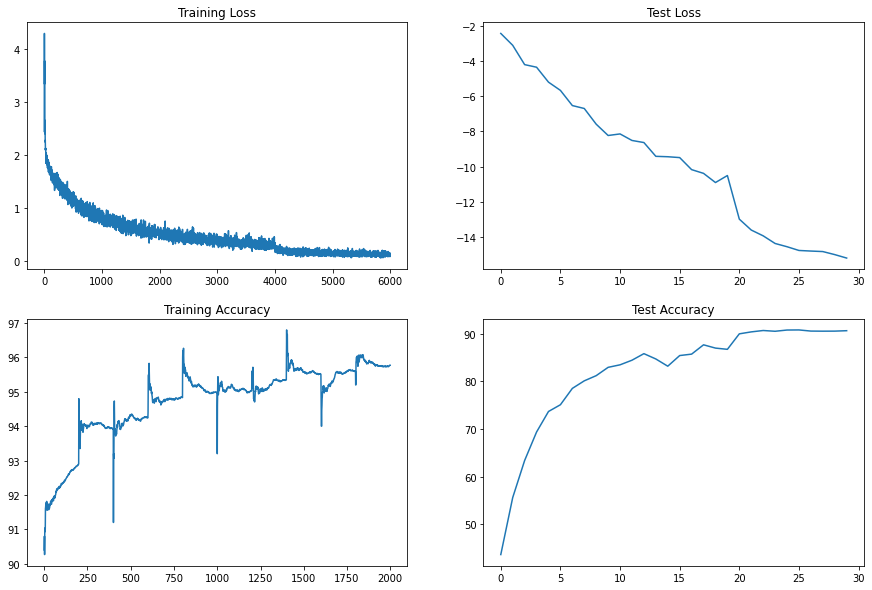

In [7]:
from asgnmt9.ModelPerformance import *

PlotTrainingGraphs(tt)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


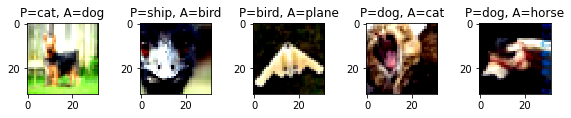

In [8]:
Misclassification(testloader,net,classes,device)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship  ship plane
Accuracy of the network on the 10000 test images: 90 %
Accuracy of plane : 83 %
Accuracy of   car : 100 %
Accuracy of  bird : 85 %
Accuracy of   cat : 78 %
Accuracy of  deer : 76 %
Accuracy of   dog : 85 %
Accuracy of  frog : 88 %
Accuracy of horse : 81 %
Accuracy of  ship : 100 %
Accuracy of truck : 100 %


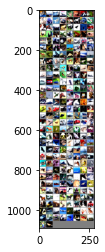

In [9]:
ViewModelPerformance(testloader,net,classes,device)

In [0]:
from asgnmt9.gradcam import GradCamDisplay
import PIL
img_name =['airplane.png','automobile.png','bird.png','cat.png','deer.png']

pil_image = []
for i,img in enumerate(img_name):
   pil_image.append(PIL.Image.open(img))


In [0]:
from asgnmt9.gradcam import *
def GradCamDisplay(model,pil_image,classes,device):
    normed_torch_img = []
    torch_img_list = []

    for i in pil_image:
      torch_img = transforms.Compose([
          transforms.Resize((32, 32)),
          transforms.ToTensor()])(i).to(device)
      torch_img_list.append(torch_img)
      normed_torch_img .append(transforms.Normalize([0.4914, 0.4822, 0.4465], [0.247, 0.243, 0.261])(torch_img)[None])

    def imshow(img,c = "" ):
        #img = img / 2 + 0.5     # unnormalize
        npimg = img.numpy()
        fig = plt.figure(figsize=(10,10))
        plt.imshow(np.transpose(npimg, (1, 2, 0)),interpolation='none')
        plt.title(c)

    for i,k in enumerate(normed_torch_img):
      images1 = [torch_img_list[i].cpu()]
      images2 =  [torch_img_list[i].cpu()]
      b = copy.deepcopy(model.to(device))
      output = model(normed_torch_img[i])
      _, predicted = torch.max(output.data, 1)
      #print(classes[int(predicted)])
      layers =  [b.layer1,b.layer2,b.layer3,b.layer4]
      
      for j in layers:
        g = GradCAM(b,j)
        mask, _= g(normed_torch_img[i])
        heatmap, result = visualize_cam(mask,torch_img_list[i] )
        images1.extend([heatmap])
        images2.extend([result])

      grid_image = make_grid(images1+images2,nrow=5)
      imshow(grid_image,c = classes[int(predicted)])


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2796: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


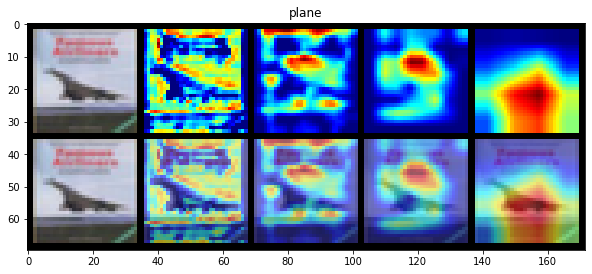

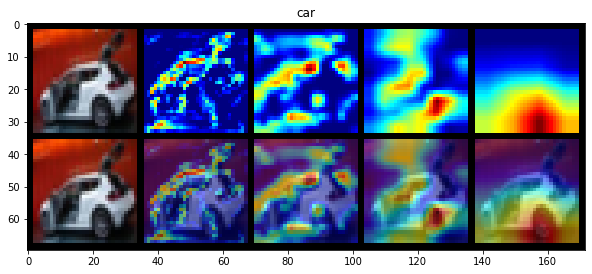

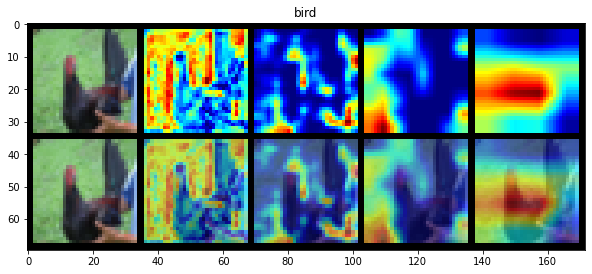

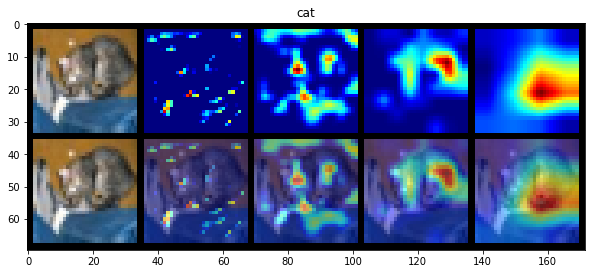

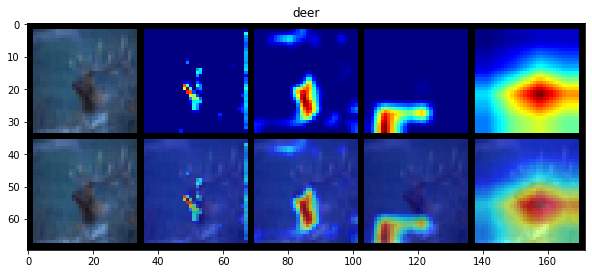

In [12]:
import copy
GradCamDisplay(net,pil_image,classes,device)